In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.plots import plot_volatilities, plot_prob_evolution
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 20

date_of_reckoning = datetime(2019,7,10)
cut_data_at_time = datetime(2019,5,12)
probability_analysis = ModelStats(data_path, data_deputados_path, simulate_time = cut_data_at_time)

probability_analysis = probability_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
probability_analysis = probability_analysis.get_changes()
probability_analysis = probability_analysis.get_fluxes()

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()

tau = probability_analysis.get_all_statements_per_politician(267)

A_trajectories, O_trajectories, all_trajectories, set_probability = probability_analysis.calculate_single_vote_probability(np.int64(267))

7it [00:00, 116.47it/s]
7it [00:00, 57009.96it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 191.97it/s]


In [59]:
def get_high_statement_volatility_politicians(probability_analysis):
    high_volatility_ids = [int(i ) for i, v in probability_analysis.from_politician_to_volatility.items() if 0.5 < v < 1]
    return high_volatility_ids

high_volatility_ids = get_high_statement_volatility_politicians(probability_analysis)

def get_high_statement_volatility_info(high_volatility_ids):
    high_volatility_politican_info = [probability_analysis.get_politician(i) for i in high_volatility_ids]
    from_name_to_id_high_vol = {info['NOME'].values[0]: int(info['Id_politico'].values[0]) for info in high_volatility_politican_info}
    from_id_to_name_high_vol = {v: k for k, v in from_name_to_id_high_vol.items()}
    return  from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info


from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info = get_high_statement_volatility_info(high_volatility_ids)

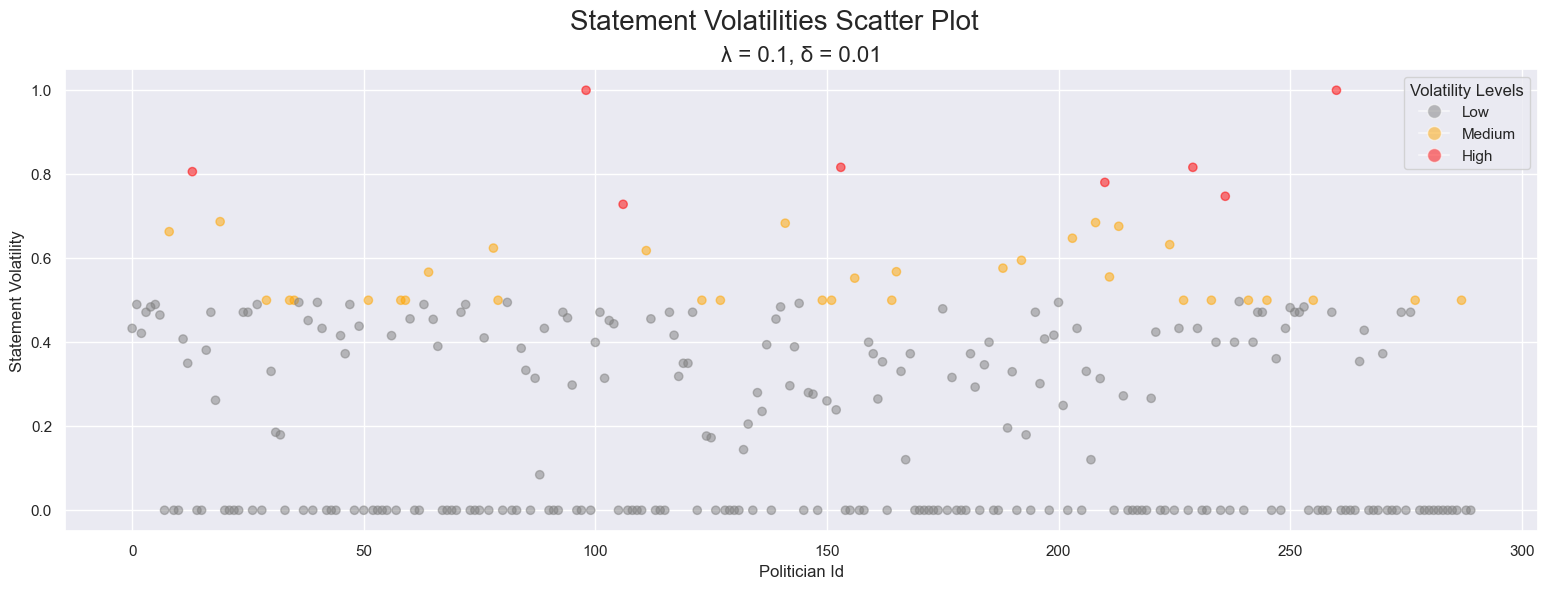

In [13]:
plot_volatilities(probability_analysis)

simulating for imperfect knowledge at each d iteration

In [55]:
date_of_reckoning = datetime(2019,9,12)

first_cut_data_at_time = datetime(2019, 5, 1)

data_time_cuts = [first_cut_data_at_time + i*timedelta(days = 20) for i in range(8)]

 

running models at different timecuts


In [60]:
def get_probability_evolution( data_time_cuts, politican_id):

    from_time_cut_to_analysis = {}
    from_time_cut_to_probability = {}

    for time_cut in tqdm(data_time_cuts):

        opinion_analysis = ModelStats(data_path, data_deputados_path, simulate_time = time_cut)
        opinion_analysis = opinion_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
        opinion_analysis = opinion_analysis.get_changes()
        opinion_analysis = opinion_analysis.get_fluxes()

        from_time_cut_to_analysis[time_cut] = opinion_analysis

        # return opinion_analysis
        A_trajectories, O_trajectories, all_trajectories, set_probability = opinion_analysis.calculate_single_vote_probability(int(politican_id))
        from_time_cut_to_probability[time_cut] = set_probability

    return from_time_cut_to_probability


# from_time_cut_to_probability




In [61]:
opinion_analysis = ModelStats(data_path, data_deputados_path)
opinion_analysis = opinion_analysis.get_votes(lambd, delta, lag, date_of_reckoning )

10it [00:00, 98.23it/s]


In [63]:

# get_probability_evolution(high_volatility_dict['ARTHUR LIRA'])

for politican in high_volatility_ids:
    from_time_cut_to_probability = get_probability_evolution( data_time_cuts,politican)
    name = from_id_to_name_high_vol[politican]
    plot_prob_evolution(name, from_time_cut_to_probability)

6it [00:00, 143.55it/s]0:00<?, ?it/s]
6it [00:00, 46863.73it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 176.31it/s]
7it [00:00, 125.38it/s]0:06<00:47,  6.72s/it]
7it [00:00, 60287.74it/s]
 12%|█▎        | 1/8 [00:07<00:49,  7.03s/it]


KeyboardInterrupt: 

In [ ]:
opinion_analysis

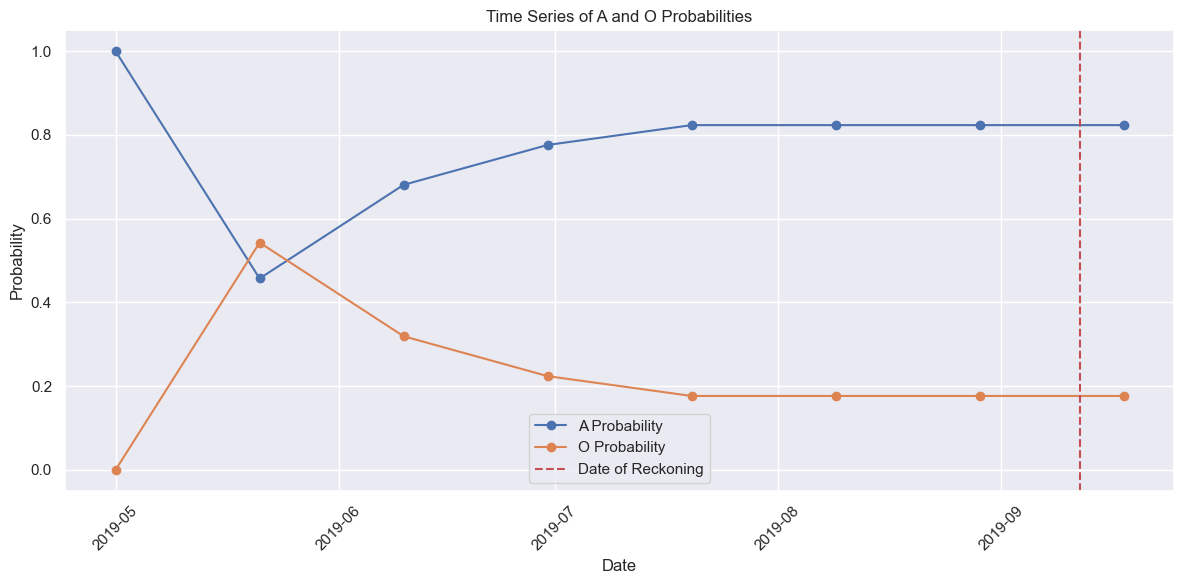

In [ ]:

plot_prob_evolution(from_time_cut_to_probability)

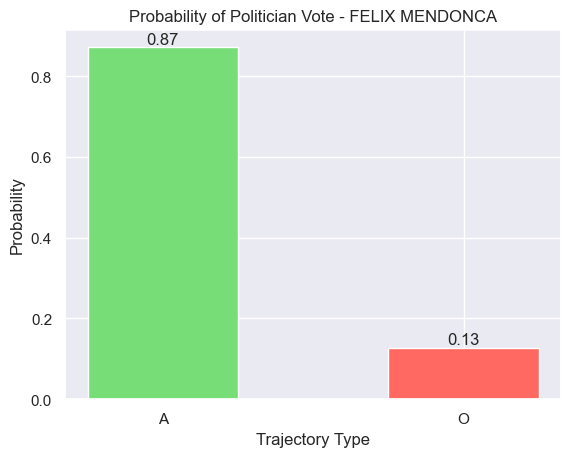

In [19]:
# set_probability
bars = plt.bar(set_probability.keys(), set_probability.values(), width=0.5, color=['#77dd77', '#ff6961'])
plt.xlabel('Trajectory Type')
plt.ylabel('Probability')
plt.title('Probability of Politician Vote - ' + probability_analysis.get_politician_names()[267])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [5]:
df = pd.read_csv("data/DATA_FINAL.csv")
df.time = pd.to_datetime(df.time)
df = df.sort_values(by=['time'])

In [5]:
tau = crop_statements_until_t_by_politician(df,'2019-07-11 15:30:16', 422)

In [ ]:

data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

probability_analysis = ModelStats(data_path, data_deputados_path)

lambd = 0.6
delta = 0.3
lag = 10


In [8]:
probability_analysis  = probability_analysis.get_votes(lambd, delta, lag, datetime(2020,1,1))

19it [00:00, 63.74it/s]


In [9]:
from datetime import datetime
from dataclasses import dataclass
from typing import List

@dataclass
class PoliticianOpinion:
    politician_name: str
    opinion_score: float

@dataclass
class PoliticiansOpinionInTime:
    politician_opinions: List[PoliticianOpinion]
    datetime: datetime

def get_politician_trajectories(opinions_in_time: List[PoliticiansOpinionInTime], politician_name: str):
    """
    Get all different trajectories of opinions for a single politician.

    Parameters:
    - opinions_in_time: List of PoliticiansOpinionInTime instances.
    - politician_name: The name of the politician.

    Returns:
    - A list of trajectories for the specified politician.
    """
    politician_trajectories = []

    # Iterate through the list of opinions_in_time
    for opinion_in_time in opinions_in_time:
        datetime_point = opinion_in_time.datetime
        # Find the politician's opinion at this datetime_point
        politician_opinion = next((opinion.opinion_score for opinion in opinion_in_time.politician_opinions
                                   if opinion.politician_name == politician_name), None)

        if politician_opinion is not None:
            # Append the datetime_point and opinion to the trajectories
            politician_trajectories.append((datetime_point, politician_opinion))

    return politician_trajectories

# Example usage:
opinions_data = [
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.8), PoliticianOpinion("Politician2", 0.5)], datetime(2023, 1, 1)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.7), PoliticianOpinion("Politician2", 0.6)], datetime(2023, 1, 2)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.6), PoliticianOpinion("Politician2", 0.7)], datetime(2023, 1, 3)),
]

politician_name_to_check = "Politician1"
trajectories = get_politician_trajectories(opinions_data, politician_name_to_check)

print(f"Opinion trajectories for {politician_name_to_check}: {trajectories}")


Opinion trajectories for Politician1: [(datetime.datetime(2023, 1, 1, 0, 0), 0.8), (datetime.datetime(2023, 1, 2, 0, 0), 0.7), (datetime.datetime(2023, 1, 3, 0, 0), 0.6)]


In [ ]:
@dataclass
class OpinionHistogram:
    """Class for identifying a single politician opinion"""
    bins: list[int]
    opinion: list[int] 

@dataclass
class ScoreHistogram:
    """Class for identifying a single politician opinion"""
    politician_id: list[int]
    opinion: list[int]